In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/cycas/ \
/Users/earl/Desktop/cyclamen')

0

In [3]:
with open('p05_index_and_pools.pkl', 'rb') as f:
    lat_warmN, lat_warmS, lon_warmW, lon_warmE, \
    SAM_index_sorted_cleaned, warm_pool_sorted_cleaned, wind_pool_sorted_cleaned = \
    pickle.load(f)
    
print(sorted(SAM_index_sorted_cleaned))

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']


In [6]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

hist_uas_path = '/Users/earl/Desktop/cyclamen/historical/mon/atmos/uas/latest/'
hist_vas_path = '/Users/earl/Desktop/cyclamen/historical/mon/atmos/vas/latest/'
hist_uas_list = sorted(os.listdir(hist_uas_path))
hist_vas_list = sorted(os.listdir(hist_vas_path))

rcp85_uas_path = '/Users/earl/Desktop/cyclamen/rcp85/mon/atmos/uas/latest/'
rcp85_vas_path = '/Users/earl/Desktop/cyclamen/rcp85/mon/atmos/vas/latest/'
rcp85_uas_list = sorted(os.listdir(rcp85_uas_path))
rcp85_vas_list = sorted(os.listdir(rcp85_vas_path))


p13_make_MMM_monthly_CMIP5


In [7]:
lon_unique = [0, 1.875, 3.75, 5.625, 7.5, 9.375, 11.25, 13.125, 15, 16.875, 18.75, 
    20.625, 22.5, 24.375, 26.25, 28.125, 30, 31.875, 33.75, 35.625, 37.5, 
    39.375, 41.25, 43.125, 45, 46.875, 48.75, 50.625, 52.5, 54.375, 56.25, 
    58.125, 60, 61.875, 63.75, 65.625, 67.5, 69.375, 71.25, 73.125, 75, 
    76.875, 78.75, 80.625, 82.5, 84.375, 86.25, 88.125, 90, 91.875, 93.75, 
    95.625, 97.5, 99.375, 101.25, 103.125, 105, 106.875, 108.75, 110.625, 
    112.5, 114.375, 116.25, 118.125, 120, 121.875, 123.75, 125.625, 127.5, 
    129.375, 131.25, 133.125, 135, 136.875, 138.75, 140.625, 142.5, 144.375, 
    146.25, 148.125, 150, 151.875, 153.75, 155.625, 157.5, 159.375, 161.25, 
    163.125, 165, 166.875, 168.75, 170.625, 172.5, 174.375, 176.25, 178.125, 
    180, 181.875, 183.75, 185.625, 187.5, 189.375, 191.25, 193.125, 195, 
    196.875, 198.75, 200.625, 202.5, 204.375, 206.25, 208.125, 210, 211.875, 
    213.75, 215.625, 217.5, 219.375, 221.25, 223.125, 225, 226.875, 228.75, 
    230.625, 232.5, 234.375, 236.25, 238.125, 240, 241.875, 243.75, 245.625, 
    247.5, 249.375, 251.25, 253.125, 255, 256.875, 258.75, 260.625, 262.5, 
    264.375, 266.25, 268.125, 270, 271.875, 273.75, 275.625, 277.5, 279.375, 
    281.25, 283.125, 285, 286.875, 288.75, 290.625, 292.5, 294.375, 296.25, 
    298.125, 300, 301.875, 303.75, 305.625, 307.5, 309.375, 311.25, 313.125, 
    315, 316.875, 318.75, 320.625, 322.5, 324.375, 326.25, 328.125, 330, 
    331.875, 333.75, 335.625, 337.5, 339.375, 341.25, 343.125, 345, 346.875, 
    348.75, 350.625, 352.5, 354.375, 356.25, 358.125]


lat_unique = [-88.5419998168945, -86.6531982421875, -84.7531967163086, 
    -82.8507995605469, -80.9474029541016, -79.0435028076172, 
    -77.1392974853516, -75.2350997924805, -73.3307037353516, 
    -71.4262008666992, -69.5216979980469, -67.6171035766602, 
    -65.7125015258789, -63.8078994750977, -61.9033012390137, 
    -59.9986000061035, -58.0940017700195, -56.1893005371094, 
    -54.2845993041992, -52.3799018859863, -50.4752006530762, 
    -48.570499420166, -46.6657981872559, -44.761100769043, -42.8563995361328, 
    -40.9516983032227, -39.0470008850098, -37.1422004699707, 
    -35.2374992370605, -33.3328018188477, -31.4281005859375, 
    -29.5233993530273, -27.6186008453369, -25.7138996124268, 
    -23.8092002868652, -21.9043998718262, -19.9997005462646, 
    -18.0949993133545, -16.1902008056641, -14.2854995727539, 
    -12.3808002471924, -10.4759998321533, -8.57129955291748, 
    -6.66660022735596, -4.76179981231689, -2.85710000991821, 
    -0.952400028705597, 0.952400028705597, 2.85710000991821, 
    4.76179981231689, 6.66660022735596, 8.57129955291748, 10.4759998321533, 
    12.3808002471924, 14.2854995727539, 16.1902008056641, 18.0949993133545, 
    19.9997005462646, 21.9043998718262, 23.8092002868652, 25.7138996124268, 
    27.6186008453369, 29.5233993530273, 31.4281005859375, 33.3328018188477, 
    35.2374992370605, 37.1422004699707, 39.0470008850098, 40.9516983032227, 
    42.8563995361328, 44.761100769043, 46.6657981872559, 48.570499420166, 
    50.4752006530762, 52.3799018859863, 54.2845993041992, 56.1893005371094, 
    58.0940017700195, 59.9986000061035, 61.9033012390137, 63.8078994750977, 
    65.7125015258789, 67.6171035766602, 69.5216979980469, 71.4262008666992, 
    73.3307037353516, 75.2350997924805, 77.1392974853516, 79.0435028076172, 
    80.9474029541016, 82.8507995605469, 84.7531967163086, 86.6531982421875, 
    88.5419998168945]

print(np.shape(lat_unique))
print(np.shape(lon_unique))

(94,)
(192,)


In [10]:
uas_hist_all = []
uas_rcp85_all = []

vas_hist_all = []
vas_rcp85_all = []

plot_list = sorted(SAM_index_sorted_cleaned)

# lon_unique = range(0,360)
# lat_unique = range(-89,90)

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(plot_list)
for m in range(12):
    for idx, model in enumerate(plot_list):
        print(months[m] + ' ' + model)
        if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
            continue
        if model in ['FGOALS-s2']:
            r = '2'
        else:
            r = '1'
#         uas_rcp85_data = xr.open_dataset(
#             rcp85_uas_path + model + '_r' + r + 'i1p1_2080-2099monthlymean.nc', decode_times=False)
#         vas_rcp85_data = xr.open_dataset(
#             rcp85_vas_path + model + '_r' + r + 'i1p1_2080-2099monthlymean.nc', decode_times=False)
        uas_hist_data = xr.open_dataset(
            hist_uas_path + model + '_r' + r + 'i1p1_1950-1969monthlymean.nc', decode_times=False)
        vas_hist_data = xr.open_dataset(
            hist_vas_path + model + '_r' + r + 'i1p1_1950-1969monthlymean.nc', decode_times=False)

        uas_hist = uas_hist_data['uas'][m,:,:]
#         uas_rcp85 = uas_rcp85_data['uas'][m,:,:]
        vas_hist = vas_hist_data['vas'][m,:,:]
#         vas_rcp85 = vas_rcp85_data['vas'][m,:,:]

        if len(uas_hist_data['lat'].shape) is 2:
            if model in ['MPI-ESM-MR']:
                uas_lat = uas_hist_data['lat'][:,0]
                uas_lon = uas_hist_data['lon'][-1,:]
            else:
                uas_lat = uas_hist_data['lat'][:,0]
                uas_lon = uas_hist_data['lon'][0,:]
        else:
            uas_lat = uas_hist_data['lat'][:]
            uas_lon = uas_hist_data['lon'][:]
        if len(vas_hist_data['lat'].shape) is 2:
            if model in ['MPI-ESM-MR']:
                vas_lat = vas_hist_data['lat'][:,0]
                vas_lon = vas_hist_data['lon'][-1,:]
            else:
                vas_lat = vas_hist_data['lat'][:,0]
                vas_lon = vas_hist_data['lon'][0,:]
        else:
            vas_lat = vas_hist_data['lat'][:]
            vas_lon = vas_hist_data['lon'][:]
            
        uas_grid_lon_now, uas_grid_lat_now = np.meshgrid(uas_lon, uas_lat)
        uas_lon_flat = np.transpose(uas_grid_lon_now.flatten('F'))
        uas_lat_flat = uas_grid_lat_now.flatten('F')
        uas_flat_list = [uas_lon_flat, uas_lat_flat]    
        uas_grid_points = np.transpose(uas_flat_list)
        uas_hist_now = uas_hist
#         uas_rcp85_now = uas_rcp85
        vas_grid_lon_now, vas_grid_lat_now = np.meshgrid(vas_lon, vas_lat)
        vas_lon_flat = np.transpose(vas_grid_lon_now.flatten('F'))
        vas_lat_flat = vas_grid_lat_now.flatten('F')
        vas_flat_list = [vas_lon_flat, vas_lat_flat]    
        vas_grid_points = np.transpose(vas_flat_list)
        vas_hist_now = vas_hist
#         vas_rcp85_now = vas_rcp85

        uas_hist_now_flatten = uas_hist_now.stack(z=('lon', 'lat'))
        vas_hist_now_flatten = vas_hist_now.stack(z=('lon', 'lat'))
#         uas_rcp85_now_flatten = uas_rcp85_now.stack(z=('lon', 'lat'))
#         vas_rcp85_now_flatten = vas_rcp85_now.stack(z=('lon', 'lat'))

        uas_hist_interp = interpolate.griddata(uas_grid_points, uas_hist_now_flatten, 
                                               (grid_lon_unique, grid_lat_unique), 
                                               method='linear')
        vas_hist_interp = interpolate.griddata(vas_grid_points, vas_hist_now_flatten, 
                                               (grid_lon_unique, grid_lat_unique), 
                                               method='linear')
#         uas_rcp85_interp = interpolate.griddata(uas_grid_points, uas_rcp85_now_flatten, 
#                                                (grid_lon_unique, grid_lat_unique), 
#                                                method='linear')
#         vas_rcp85_interp = interpolate.griddata(vas_grid_points, vas_rcp85_now_flatten, 
#                                                (grid_lon_unique, grid_lat_unique), 
#                                                method='linear')
        if idx == 0:
            uas_hist_unique = uas_hist_interp
            vas_hist_unique = vas_hist_interp
#             uas_rcp85_unique = uas_rcp85_interp
#             vas_rcp85_unique = vas_rcp85_interp
        else:
            uas_hist_unique = np.dstack((uas_hist_unique, uas_hist_interp))
            vas_hist_unique = np.dstack((vas_hist_unique, vas_hist_interp)) 
#             uas_rcp85_unique = np.dstack((uas_rcp85_unique, uas_rcp85_interp))
#             vas_rcp85_unique = np.dstack((vas_rcp85_unique, vas_rcp85_interp))
        print(uas_hist_unique.shape)
        print(months[m] + ' ' + model + ' OK!')
    
    print(months[m] + ' completed...')
    if m == 0:
        uas_hist_MMM = np.mean(uas_hist_unique, axis=2)
        vas_hist_MMM = np.mean(vas_hist_unique, axis=2)
#         uas_rcp85_MMM = np.mean(uas_rcp85_unique, axis=2)
#         vas_rcp85_MMM = np.mean(vas_rcp85_unique, axis=2)
    else:
        uas_hist_MMM = np.dstack((uas_hist_MMM, np.mean(uas_hist_unique, axis=2)))
        vas_hist_MMM = np.dstack((vas_hist_MMM, np.mean(vas_hist_unique, axis=2)))
#         uas_rcp85_MMM = np.dstack((uas_rcp85_MMM, np.mean(uas_rcp85_unique, axis=2)))
#         vas_rcp85_MMM = np.dstack((vas_rcp85_MMM, np.mean(vas_rcp85_unique, axis=2)))
    print(uas_hist_MMM.shape)
    print(months[m] + ' MMM OK!')
    

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']
Jan ACCESS1-0
(94, 192)
Jan ACCESS1-0 OK!
Jan ACCESS1-3
(94, 192, 2)
Jan ACCESS1-3 OK!
Jan CMCC-CM
(94, 192, 3)
Jan CMCC-CM OK!
Jan CMCC-CMS
(94, 192, 4)
Jan CMCC-CMS OK!
Jan CNRM-CM5
(94, 192, 5)
Jan CNRM-CM5 OK!
Jan CSIRO-Mk3-6-0
(94, 192, 6)
Jan CSIRO-Mk3-6-0 OK!
Jan CanESM2
(94, 192, 7)
Jan CanESM2 OK!
Jan FGOALS-s2
(94, 192, 8)
Jan FGOALS-s2 OK!
Jan GFDL-CM3
(94, 192, 9)
Jan GFDL-CM3 OK!
Jan GFDL-ESM2G
(94, 192, 10)
Jan GFDL-ESM2G OK!
Jan GFDL-ESM2M
(94, 192, 11)
Jan GFDL-ESM2M OK!
Jan HadGEM2-AO
(94, 192, 12)
Jan HadGEM2-AO OK!
Jan IPSL-CM5A-LR
(94, 192, 13)
Jan IPSL-CM5A-LR OK!
Jan IPSL-CM5A-MR
(94, 192, 14)
Jan IPSL-CM5A-MR OK!
Jan IPSL-CM5B-LR
(94, 192, 15)
Jan IPSL-CM5B-LR OK!
Jan MIROC-ESM
(9

(94, 192, 17)
Aug MIROC-ESM-CHEM OK!
Aug MPI-ESM-MR
(94, 192, 18)
Aug MPI-ESM-MR OK!
Aug MRI-CGCM3
(94, 192, 19)
Aug MRI-CGCM3 OK!
Aug MRI-ESM1
(94, 192, 20)
Aug MRI-ESM1 OK!
Aug NorESM1-M
(94, 192, 21)
Aug NorESM1-M OK!
Aug completed...
(94, 192, 8)
Aug MMM OK!
Sep ACCESS1-0
(94, 192)
Sep ACCESS1-0 OK!
Sep ACCESS1-3
(94, 192, 2)
Sep ACCESS1-3 OK!
Sep CMCC-CM
(94, 192, 3)
Sep CMCC-CM OK!
Sep CMCC-CMS
(94, 192, 4)
Sep CMCC-CMS OK!
Sep CNRM-CM5
(94, 192, 5)
Sep CNRM-CM5 OK!
Sep CSIRO-Mk3-6-0
(94, 192, 6)
Sep CSIRO-Mk3-6-0 OK!
Sep CanESM2
(94, 192, 7)
Sep CanESM2 OK!
Sep FGOALS-s2
(94, 192, 8)
Sep FGOALS-s2 OK!
Sep GFDL-CM3
(94, 192, 9)
Sep GFDL-CM3 OK!
Sep GFDL-ESM2G
(94, 192, 10)
Sep GFDL-ESM2G OK!
Sep GFDL-ESM2M
(94, 192, 11)
Sep GFDL-ESM2M OK!
Sep HadGEM2-AO
(94, 192, 12)
Sep HadGEM2-AO OK!
Sep IPSL-CM5A-LR
(94, 192, 13)
Sep IPSL-CM5A-LR OK!
Sep IPSL-CM5A-MR
(94, 192, 14)
Sep IPSL-CM5A-MR OK!
Sep IPSL-CM5B-LR
(94, 192, 15)
Sep IPSL-CM5B-LR OK!
Sep MIROC-ESM
(94, 192, 16)
Sep MIROC-ESM

Jan


NameError: name 'uas_rcp85_MMM' is not defined

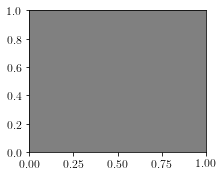

In [11]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 4
col = 7
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 12)

count = -1
p = 0
for idx in range(12):
    print(months[idx])
    t = plot_list[idx]
    count += 1
    if count is col:
        count = 0
        p += 1
    
    ax = plt.subplot2grid((row, col), (p*2, count))
    cmap = plt.get_cmap('RdBu_r')
    step = 0.5
    contf_lvls = np.arange(-2,2+1e-08,step)           
    ax.set_facecolor('grey')
    contf = plt.contourf(lon_unique, lat_unique,
                         uas_rcp85_MMM[:,:,idx]-uas_hist_MMM[:,:,idx], contf_lvls, cmap=cmap, extend='both')
    ax.set_title('uas anom ' + months[idx])
    if idx == len(range(12))-1:
        ax = plt.subplot2grid((row, col), (p*2, count+1), colspan=3)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$uas$ $m/s$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
        
    ax = plt.subplot2grid((row, col), (1+p*2, count))
    cmap = plt.get_cmap('BrBG_r')
    step = 0.5
    contf_lvls = np.arange(-2,2+1e-08,step) 
    ax.set_facecolor('grey')
    contf = plt.contourf(lon_unique, lat_unique, 
                         vas_rcp85_MMM[:,:,idx]-vas_hist_MMM[:,:,idx], contf_lvls, cmap=cmap, extend='both')
    ax.set_title('vas anom ' + months[idx])
    if idx == len(range(12))-1:
        ax = plt.subplot2grid((row, col), (1+p*2, count+1), colspan=3)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$vas$ $m/s$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
    
plt.tight_layout()

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=200)
    

    


In [13]:
with open(script_name + '_1950-1969.pkl', 'wb') as f:
    pickle.dump([lon_unique, lat_unique, 
                 uas_hist_MMM, vas_hist_MMM], f)